# DATA623 Assignment #3 - COVID-19 Data
#### Jordan Swanson 10005366

## Background/Rationale

In early 2020, the first case of COVID-19 was detected in Canada [1]. In the two years since, the world has grappled with the effects of the virus not only on the healthcare system, but on the economy and the general well-being of its citizens. Late 2020 saw the arrival of vaccines, of which the timeline of their development and distribution is nothing short of a miracle, and was touted as being humanity's key to ending the pandemic. Unfortunately, for a multitude of reasons, a sizeable portion of the population has been hesitant or flat-out against vaccination, which has likely contributed to the ongoing crisis.

Initially, vaccines were targeted at the most vulnerable parts of the population, starting with the oldest age groups and slowly lowering the qualifying age as supply ramped up. By May 10, 2021, all Albertans born in 2009 or later were eligible for vaccines [2], though this date differed by province. More recently on November 19th, 2021, vaccine eligibility across Canada was expanded to include anyone 5 years of age or older [3], with expectations of a vaccine being available for even younger groups in the near future.

When the vaccines were first rolled out, the reduction in deaths in older age groups was immediately apparent [4], and the general mood of the country was of a light at the end of the tunnel. However, over the last year we've seen the rise of "variants of concern (VOCs)" that have shown to be capable of evading the protection conferred by vaccines, which has only lessened the public's already deteriorating opinion of vaccination. As of the date of writing of this (February 4th, 2022), there's evidence that the Omicron variant has reached its peak in Alberta, though hospitalizations remain as high as they've ever been. The question that I'd like to ask is, **regardless of the infectious ability of these new variants, has uptake for the COVID-19 vaccines waned since they were first made available?**

## Objective

Utilizing COVID-19 vaccination data for all of Canada, can we detect a difference (namely, a decrease) in vaccine uptake at each stage where eligibility was expanded? Further yet, how does that compare by province/territory?

## Methods

To compare the data of the provinces and territories in Canada, we'll utilize the publicly-available dataset for vaccines from the Government of Canada's Public Health Infobase [5]. Within this dataset is the weekly update of the number and proportion of Canadians vaccinated with one of Health Canada's approved COVID-19 vaccines, with data available nationally and by province/territory. The data is further broken by which category of eligibility Canadians fall into (>5 years old, >18 years old, eligible, and all). The data spans the period of December 19th, 2020 to January 30th, 2022.

The first step is to visually compare the uptake of both first and second doses by graphing them overlapping together. This should be an easy way to compare the rate of vaccine uptake between provinces. This is available in Figure 1.

To compare the difference between uptake, we will next take the mathematical difference between the proportion of Canadians fully vaccinated, and those partially vaccinated, at each observation point (Figure 2). As the second dose was initially only given at least 8 weeks following the first, we will shift the data so that the starting point is the same for both groups. Admittedly, this part of the analysis is cloudy, as the recommendation was changed in the middle of the rollout, and varies between provinces, though 8 weeks seems to be the best arbitrary value for shifting the time data.

Finally, in order to have a yardstick against which we can compare the differences, we will also calculate the Canadian average of the differences, and show that as a red dashed line on each of the province and territory's graphs. 

In [89]:
# Initial data import (from https://health-infobase.canada.ca/src/data/covidLive/vaccination-coverage-map.csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
pd.set_option('mode.chained_assignment', None)

data = pd.read_csv("vaccination-coverage-map.csv")
data["week_end"] = pd.to_datetime(data["week_end"])

# Split data by province/territory/Canada
provnames = ["Canada", 
             "Alberta", 
             "British Columbia", 
             "Manitoba", 
             "New Brunswick", 
             "Newfoundland and Labrador", 
             "Northwest Territories",
             "Nova Scotia",
             "Nunavut",
             "Ontario",
             "Prince Edward Island",
             "Quebec",
             "Saskatchewan",
             "Yukon"]

candata = data[data["prename"]=="Canada"]
abdata = data[data["prename"]=="Alberta"]
bcdata = data[data["prename"]=="British Columbia"]
mbdata = data[data["prename"]=="Manitoba"]
nbdata = data[data["prename"]=="New Brunswick"]
nldata = data[data["prename"]=="Newfoundland and Labrador"]
ntdata = data[data["prename"]=="Northwest Territories"]
nsdata = data[data["prename"]=="Nova Scotia"]
nudata = data[data["prename"]=="Nunavut"]
ondata = data[data["prename"]=="Ontario"]
pedata = data[data["prename"]=="Prince Edward Island"]
qcdata = data[data["prename"]=="Quebec"]
skdata = data[data["prename"]=="Saskatchewan"]
ytdata = data[data["prename"]=="Yukon"]

provdata = [candata, abdata, bcdata, 
            mbdata, nbdata, nldata, 
            ntdata, nsdata, nudata, 
            ondata, pedata, qcdata, 
            skdata, ytdata]

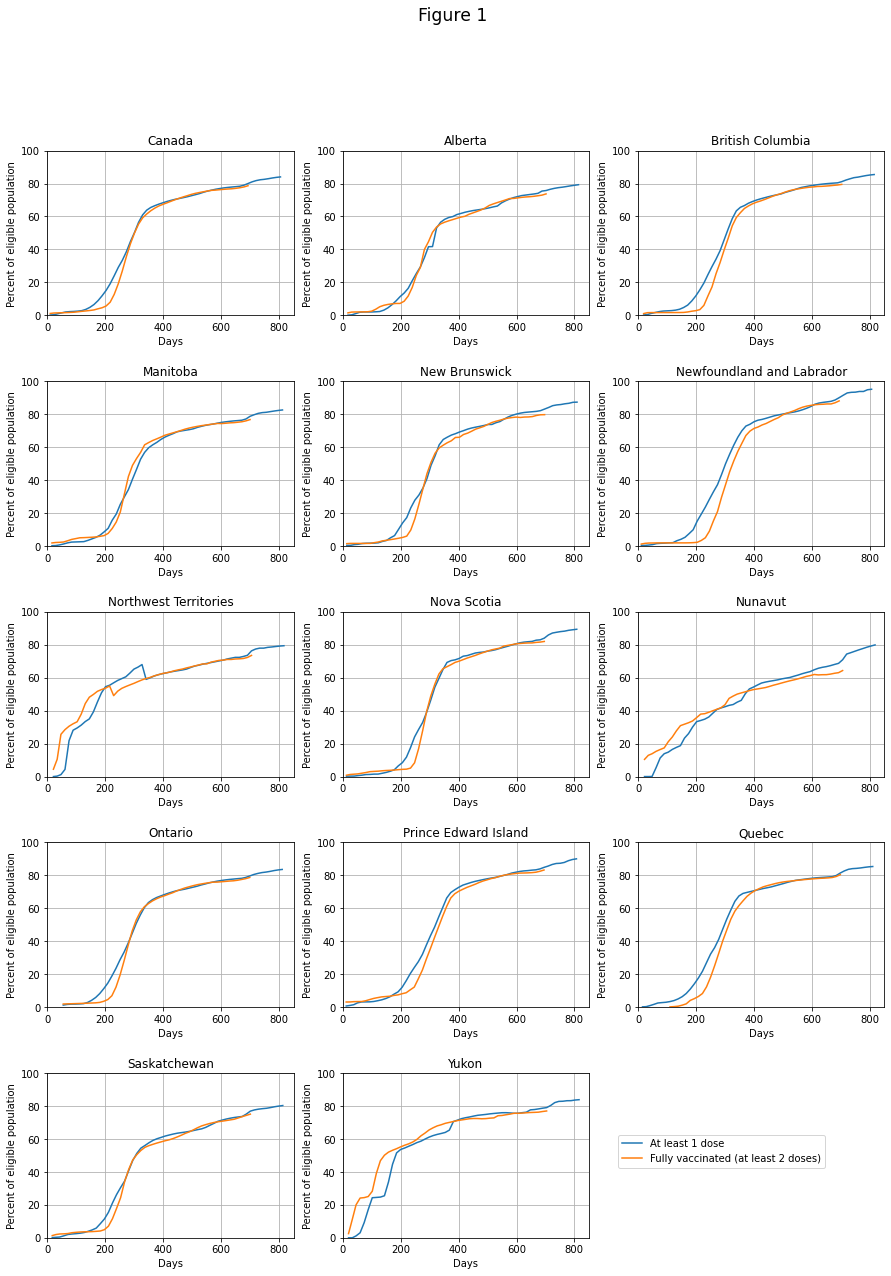

In [135]:
# Plots

fig, ((ax0, ax1, ax2), 
      (ax3, ax4, ax5), 
      (ax6, ax7, ax8), 
      (ax9, ax10, ax11), 
      (ax12, ax13, ax14)) = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle("Figure 1", size="xx-large")
ax14.set_visible(False)
fig.subplots_adjust(hspace=0.4)


# Plot data, shifting the second dose curve (-8) weeks to coincide with the beginning of first-dose rollout
for i, prov in enumerate(provdata):
    ax = plt.subplot(5, 3, i+1)
    ax.set_title(provnames[i])
    ax.set_xlabel("Days")
    ax.set_ylabel("Percent of eligible population")
    ax.set_ylim(0, 100)
    ax.set_xlim(0, 850)
    prov[prov["week_end"]>"2020-12-19"]["proptotal_atleast1dose"].plot(ax=ax)
    prov[prov["week_end"]>"2020-12-19"].shift(-8)["proptotal_fully"].plot(ax=ax)
    plt.grid()
fig.legend(["At least 1 dose", "Fully vaccinated (at least 2 doses)"], bbox_to_anchor=[0.85, 0.2])
plt.show()

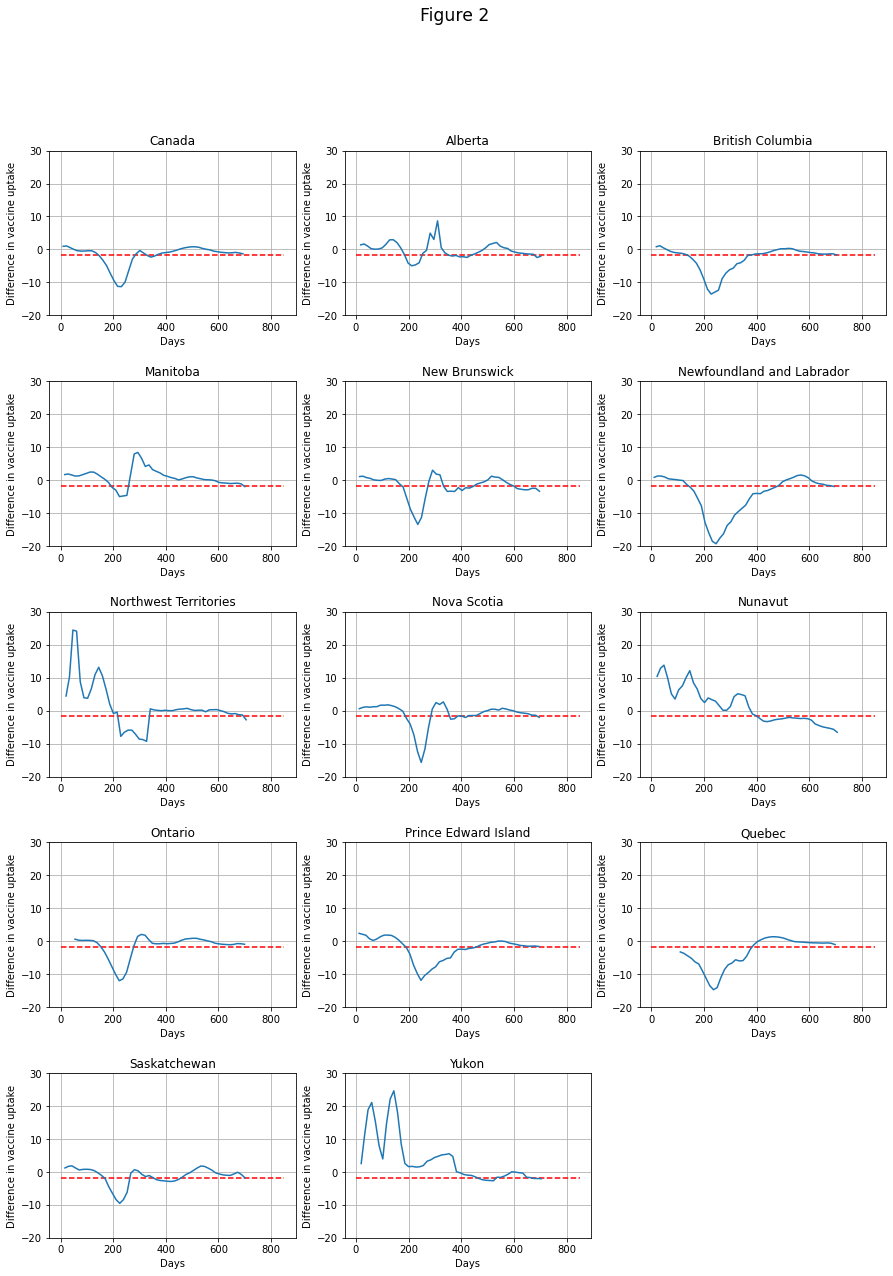

In [137]:
# Second plot of differences in vaccine uptake
fig, ((ax0, ax1, ax2), 
      (ax3, ax4, ax5), 
      (ax6, ax7, ax8), 
      (ax9, ax10, ax11), 
      (ax12, ax13, ax14)) = plt.subplots(5, 3, figsize=(15, 20))
ax14.set_visible(False)
fig.subplots_adjust(hspace=0.4)
fig.suptitle("Figure 2", size="xx-large")
canDiff = candata["prop_diff"].mean()

for i, prov in enumerate(provdata):
    prov["prop_diff"] = prov["proptotal_fully"].shift(-8) - prov["proptotal_atleast1dose"]
    ax = plt.subplot(5, 3, i+1)
    ax.hlines(y=canDiff, xmin=0, xmax=850, colors="red", linestyles="dashed", label="Canadian average")
    ax.set_title(provnames[i])
    ax.set_xlabel("Days")
    ax.set_ylabel("Difference in vaccine uptake")
    ax.set_ylim(-20,30)
    prov[prov["week_end"]>"2020-12-19"]["prop_diff"].plot(ax=ax)
    plt.grid()

## Results

As we can see in the plots above, there are certainly differences in vaccine rollout between the provinces. A quick look reveals that the territories had a much different response as well, with a somewhat flatter curve (indicating consistent uptake), and presumably a few changes in recordkeeping that led to a few blips in the data. 

Though the plots are a visually appealing way to see the differences, it can be difficult to appreciate the small changes in uptake between the two vaccines. To quantify that relationship, we were able to look at the difference in the proportion of the population that received the first and second doses, with negative values indicating higher proportion of uptake for the first vaccine. Of course, it's mathematically impossible for the proportion of second doses to exceed that of the first dose in the long run, but we can track the difference over time and compare it to the average difference.

The general trend in the provinces, and across the nation as a whole, was for a large downturn in second dose uptake around the 200 day mark. Some provinces experienced this with a much different magnitude, but as a whole most seemed to hover around the mean for the remainder of the measured period. This dip could also be due to provinces opening up first doses to *all* eligible Canadians, while restricting second doses until more supply was delivered.

## Discussion

In the ongoing battle with the COVID-19 virus, more and more animosity is growing between those choosing to get vaccinated, and those choosing not to. As more and more VOCs continue to arrive in the country, and push our already fragile healthcare system beyond its breaking point, much emphasis has been put on the role of vaccines. Outside of Canada, some nations are choosing to relax their COVID-19 restrictions altogether [6], though that decision was made due to their highly vaccinated populations.

Only at very few points during the rollouts of the vaccines has supply been a concern. Perhaps the dip in second dose uptake that seemed to be common across the country around day 200 is due to the unavailability of doses, but at this point in time the conversation has instead shifted to how to distribute the excess vaccines to countries that need them [7]. By many measures, it would seem that we're nearing the point of the maximum number of Canadians that will choose to get vaccinated.

By comparing the uptake of the first and second doses of the vaccines, it appears that not too much a difference exists in willingness to get a second, for Canadians who have already received their first. Seemingly the major roadblock is convincing Canadians to receive their first vaccine, which is a much large proportion of the population than those who are waiting to receive their second. In the face of rising VOCs that have shown to be far more infectious than the original strain of COVID-19 that first began this pandemic, it would appear that any concern about the efficacy of the vaccines has not stopped Canadians from seeking out vaccination.

## Limitations

The biggest limitation of this analysis is the time period chosen to shift the second dose dates to line up with the first dose dates. I chose 8 weeks, as that was the initial guideline from Health Canada on the best period of time to wait between receiving doses, but that guideline changed during the rollout, and differed by province. However, without tracking individuals and their timelines for vaccination, the exact timings of the differences may be exceptionally difficult to pin down.

Another common issue that would make this analysis more difficult is that ultimately healthcare is in the hands of the provinces. Each province and territory is allowed to set its own policy regarding decisions around not just COVID-19, but all manner of health-related decisions. This can confound the data, as eligibility and timelines differs depending on what part of the country you live in. It also can be greatly affected by both the population and population density of each province, not to mention the allocation of provincial money to healthcare.

Furthermore, using the arithmetic difference of the proportion of Canadians vaccinated is a quick but flawed measure. It relies heavily on assuming that the aforementioned shift in days was at least somewhat accurate, as deviations would massively inflate the difference. This measure also suffers from the comparison with the Canadian average, where due to provinces having their own control of healthcare, they would differ in approaches to COVID-19.

Lastly, I chose to ignore the uptake of additional vaccines ("booster shots"), as many Canadians are only recently becoming eligible for those. It's a shame, as that would be the metric most interesting to look at in terms of uptake, but unfortunately not enough Canadians have received boosters to make it comparable to the first two shots.

## References

[1]
https://www.ctvnews.ca/health/coronavirus/it-wasn-t-called-covid-at-the-time-one-year-since-canada-s-first-covid-19-case-1.5279999

[2]
https://globalnews.ca/news/7836113/alberta-covid-19-vaccine-12-year-olds-booking/

[3]
https://www.canada.ca/content/dam/phac-aspc/documents/services/immunization/national-advisory-committee-on-immunization-naci/recommendations-use-covid-19-vaccines/pfizer-biontech-10-mcg-children-5-11-years-age/pfizer-biontech-10-mcg-children-5-11-years-age.pdf

[4]
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19/epidemiological-economic-research-data/excess-mortality-impacts-age-comorbidity.html

[5]
https://health-infobase.canada.ca/src/data/covidLive/vaccination-coverage-map.csv

[6]
https://globalnews.ca/news/8585643/denmark-lifts-covid-restrictions/

[7]
https://www.cbc.ca/news/health/extra-vaccines-donation-pledge-1.6288998